# Analiza koszykowa - cross selling, z Python

# [Analityk.edu.pl](https://analityk.edu.pl)


Poniższy Juputer Notebook, demostruje analalizę reguł asocjacyjnych, w kontekście analizy koszykowe. Innymi słowy: Które produktu kupowana są razem.

Pełen artukuł, znajduje się na stronie [analityka](https://analityk.edu.pl/analiza-koszykowa-i-cross-selling-w-python)

## 1 - Import niezbędnych bibliotek. 
W celu znalezienia reguł asocjacyjnych, skorzystamy z biblioteki mlxtend

In [94]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - utworzenie zbioru danych

biblioteka mlxtend, operuje na danych typu DataFrame

In [156]:
lista = pd.DataFrame({
        'mleko':[1,0,1,1,1,0,0,0,0,1],
        'chleb':[1,1,0,0,0,1,1,1,1,0],
        'ser':[0,1,0,0,0,0,1,1,1,1],
        'woda':[0,0,1,1,0,1,0,0,0,0],
        'cukierki':[0,0,1,0,0,1,0,0,0,1],
        'jabłka':[1,0,0,0,0,1,1,1,0,1],
        'gazeta':[1,0,1,1,0,0,0,1,1,0]})

lista

,chleb,cukierki,gazeta,jabłka,mleko,ser,woda
0,1,0,1,1,1,0,0
1,1,0,0,0,0,1,0
2,0,1,1,0,1,0,1
3,0,0,1,0,1,0,1
4,0,0,0,0,1,0,0
5,1,1,0,1,0,0,1
6,1,0,0,1,0,1,0
7,1,0,1,1,0,1,0
8,1,0,1,0,0,1,0
9,0,1,0,1,1,1,0


## sprawdzamy częstotliwość występowania różnych kombinacji

In [171]:
freq_items = apriori(lista, min_support=0.2, use_colnames=True)
freq_items.head(10)

,support,itemsets
0,0.6,(chleb)
1,0.3,(cukierki)
2,0.5,(gazeta)
3,0.5,(jabłka)
4,0.5,(mleko)
5,0.5,(ser)
6,0.3,(woda)
7,0.3,"(chleb, gazeta)"
8,0.4,"(chleb, jabłka)"
9,0.4,"(chleb, ser)"


## sprawdzamy reguły asocjacyjne, których mamy zaufanie
## confidence > 0.65

In [172]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.65)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cukierki),(mleko),0.3,0.5,0.2,0.666667,1.333333,0.05,1.5
1,(woda),(cukierki),0.3,0.3,0.2,0.666667,2.222222,0.11,2.1
2,(cukierki),(woda),0.3,0.3,0.2,0.666667,2.222222,0.11,2.1
3,(cukierki),(jabłka),0.3,0.5,0.2,0.666667,1.333333,0.05,1.5
4,"(chleb, gazeta)",(ser),0.3,0.5,0.2,0.666667,1.333333,0.05,1.5


In [173]:
rules.sort_values(by='confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(woda, mleko)",(gazeta),0.2,0.5,0.2,1.0,2.000000,0.10,inf
5,"(ser, gazeta)",(chleb),0.2,0.6,0.2,1.0,1.666667,0.08,inf
8,"(jabłka, gazeta)",(chleb),0.2,0.6,0.2,1.0,1.666667,0.08,inf
12,"(woda, gazeta)",(mleko),0.2,0.5,0.2,1.0,2.000000,0.10,inf
16,(ser),(chleb),0.5,0.6,0.4,0.8,1.333333,0.10,2.0


In [175]:
rules["rule"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

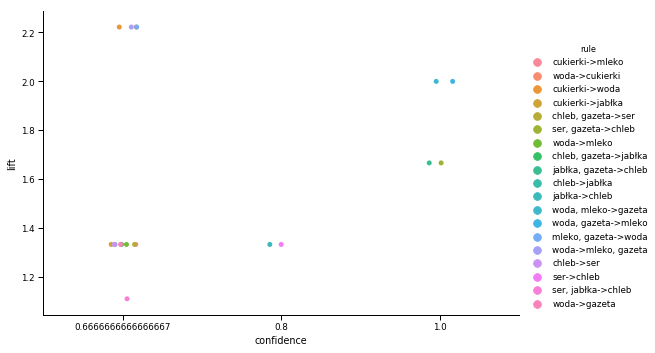

In [180]:
sns.set_context('paper')
sns.catplot(data=rules,
           x = "confidence",
           y = "lift",
           aspect = 1.5,
           hue = "rule")
plt.show()